In [14]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install descartes

In [15]:
import locale
import numpy as np
import pandas as pd
import geopandas as gpd

from pylab import cm                                                             
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.pyplot import figure

#import figure_size
plt.style.use("mplstyle")

In [16]:
flute_dir = "/Users/dph0rgb/Box Sync/Research/Flute/FluTE_UK/"

flute_id = pd.read_csv(
    flute_dir + "northeast_tracts",
    delimiter=',',
    delim_whitespace=False,
)

log = pd.read_csv(
    flute_dir + "northeast_log",
    delimiter=',',
    delim_whitespace=False,
    #dtype={'':int,'':str,'':int,'':int,'':int,'':int,'':int,'':int,'':int,'':int,'':int,'':int},
)
#log = log.astype({'TractID': 'str'})
#log = log.groupby(["time"]).sum(axis=1)  # sum all areas to complete region (North East)

In [17]:
# dictionaries from FluTe to NOMIS
RGN17CD_df = pd.read_csv(
    flute_dir + "input_ew/RGN17CD_dict.csv",
    delimiter=',',
    delim_whitespace=False,
)
RGN17CD_df = RGN17CD_df.rename(columns={"Unnamed: 0": "nomis id"})
LAD11CD_df = pd.read_csv(
    flute_dir + "input_ew/LAD11CD_dict.csv",
    delimiter=',',
    delim_whitespace=False,
)
LAD11CD_df = LAD11CD_df.rename(columns={"Unnamed: 0": "nomis id"})
MSOA11CD_df = pd.read_csv(
    flute_dir + "input_ew/MSOA11CD_dict.csv",
    delimiter=',',
    delim_whitespace=False,
)
MSOA11CD_df = MSOA11CD_df.rename(columns={"Unnamed: 0": "nomis id"})

In [18]:
for flute_key in flute_id["TractID"].values:
    trans_key = flute_id[flute_id["TractID"] == flute_key]["FIPStract"].values[0]
    nomis_key = MSOA11CD_df[MSOA11CD_df["flute id"] == trans_key]["nomis id"].values[0]
    log["TractID"] = log["TractID"].replace(flute_key, nomis_key)

In [26]:
log

,time,sym0-4,sym5-18,sym19-29,sym30-64,sym65+,cumsym0-4,cumsym5-18,cumsym19-29,cumsym30-64,cumsym65+,cumsym0-inf
TractID,,,,,,,,,,,,
E02002536,181,0,0,0,0,0,1261,1375,333,1324,764,5057
E02002537,181,0,0,0,0,0,1123,1347,335,1449,717,4971
E02002534,181,0,0,0,0,0,642,791,172,810,449,2864
E02002535,181,0,0,0,0,0,1167,1320,279,1199,714,4679
E02002532,181,0,0,0,0,0,802,937,253,1026,559,3577
...,...,...,...,...,...,...,...,...,...,...,...,...
E02004348,181,0,0,0,0,0,997,1184,262,1155,651,4249
E02004349,181,0,0,0,0,0,1193,1326,269,1123,690,4601
E02005724,181,0,0,0,0,0,775,932,224,1011,536,3478


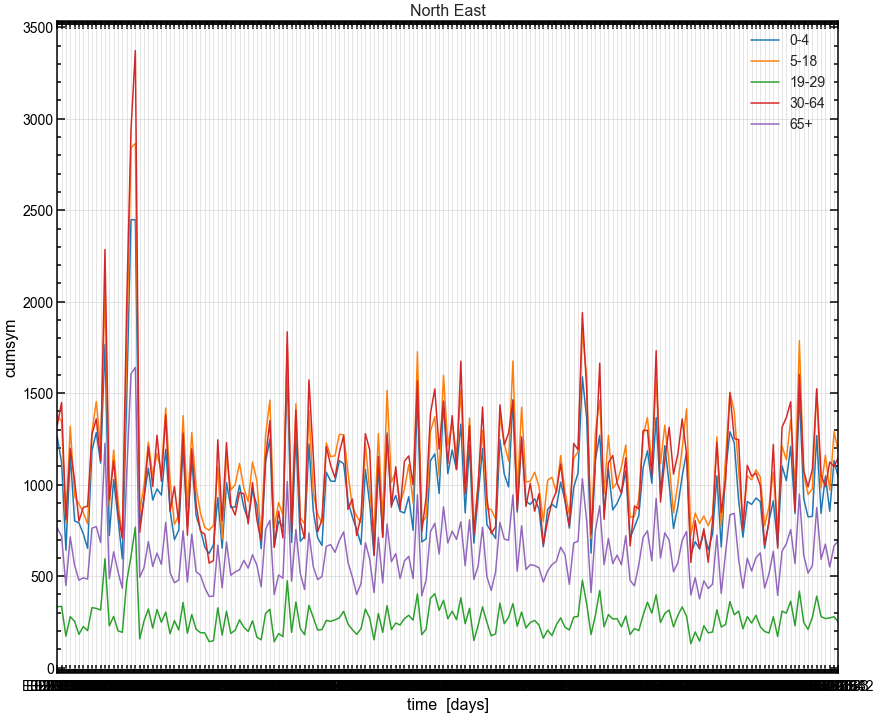

In [27]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 12),
    facecolor="w", edgecolor="k",
)

plt.plot(
    log.index.values,
    log["cumsym0-4"].values,
    label="0-4",
)
plt.plot(
    log.index.values,
    log["cumsym5-18"].values,
    label="5-18",
)
plt.plot(
    log.index.values,
    log["cumsym19-29"].values,
    label="19-29",
)
plt.plot(
    log.index.values,
    log["cumsym30-64"].values,
    label="30-64",
)
plt.plot(
    log.index.values,
    log["cumsym65+"].values,
    label="65+",
)

plt.xlim([0, 180])
plt.xlabel(r'time  [days]', fontsize=16)
plt.ylabel(r'cumsym', fontsize=16)
plt.title(r"North East")
plt.legend(loc='best')
plt.grid()

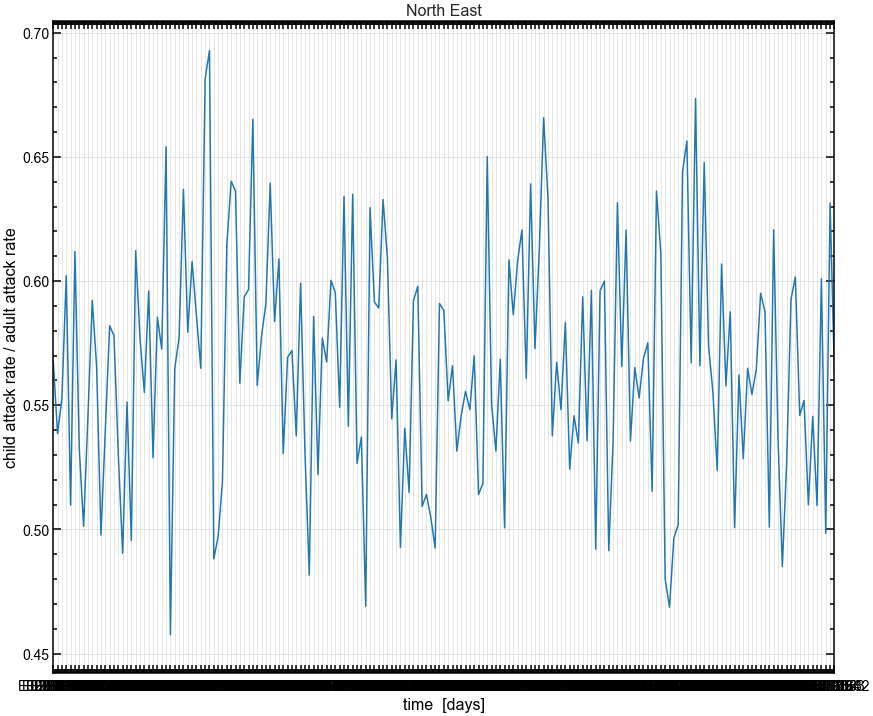

In [28]:
fig, ax = plt.subplots(
    1, 1, figsize=(14, 12),
    facecolor="w", edgecolor="k",
)

plt.plot(
    log.index.values,
    log["cumsym5-18"].values / \
    log[["cumsym19-29", "cumsym30-64", "cumsym65+"]].sum(axis=1).values,
)

plt.xlim([0, 180])
plt.xlabel(r'time  [days]', fontsize=16)
plt.ylabel(r'child attack rate / adult attack rate', fontsize=16)
plt.title(r"North East")
plt.grid()

In [29]:
dirs = "./Middle_Layer_Super_Output_Areas_December_2011_Full_Clipped_Boundaries_in_England_and_Wales/"
ew_shape = gpd.read_file(
    dirs+'Middle_Layer_Super_Output_Areas_December_2011_Full_Clipped_Boundaries_in_England_and_Wales.shp'
)
ew_shape = ew_shape.set_index('msoa11cd')

In [30]:
log = log[log["time"] == 181].set_index('TractID')
log["cumsym0-inf"] = log[["cumsym0-4","cumsym5-18","cumsym19-29","cumsym30-64","cumsym65+"]].sum(axis=1)

region_shape = ew_shape.merge(
    log[["time", "cumsym0-inf"]],
    left_index=True,
    right_index=True
)

KeyError: "None of ['TractID'] are in the columns"

In [24]:
# Convert to Lon. & Lat.
# https://gis.stackexchange.com/questions/302699/extracting-longitude-and-latitude-from-shapefile
test = region_shape.to_crs(epsg=4326)  # EPSG 4326 = WGS84 = https://epsg.io/4326
durham = [54.7753, 1.5849]
newcastle_ut = [54.9783, 1.6178]

'\n# Convert axis ticks units from m to km\nlabels = [item.get_text() for item in ax.get_xticklabels()]\nlabels = [float(item)/1e3 for item in labels]\nax.set_xticklabels(labels)\nlabels = [item.get_text() for item in ax.get_yticklabels()]\nlabels = [float(item)/1e3 for item in labels]\nax.set_yticklabels(labels)\nplt.xlabel("x  [km]")\nplt.xlabel("y  [km]")\n'

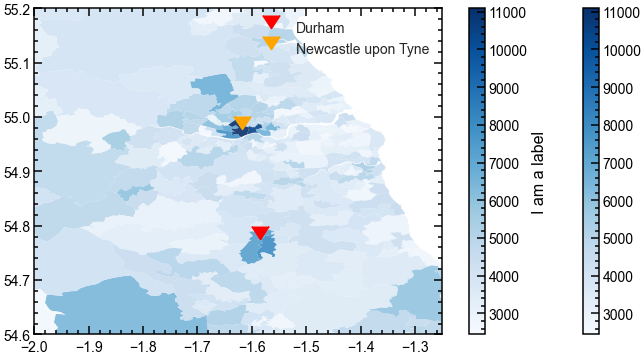

In [25]:
fig, ax = plt.subplots(
    figsize=(12, 6),
)

norm = colors.Normalize(vmin=log["cumsym0-inf"].values.min(), vmax=log["cumsym0-inf"].values.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='Blues')

test.plot(
    column="cumsym0-inf",
    ax=ax,
    legend=True,
    cmap=cm.Blues,
    alpha=0.9,
    categorical=False,
)
plt.scatter(
    -1.5849, 54.7753,
    marker=7, #'+',
    s=300,
    c='red',
    label="Durham"
)
plt.scatter(
    -1.6178, 54.9783,
    marker=7,#'+',
    s=300,
    c='orange',
    label="Newcastle upon Tyne"
)

ax_cbar = fig.colorbar(cbar, ax=ax)
ax_cbar.set_label('I am a label')
plt.legend(loc='best')
plt.xlim([-2.0, -1.25])
plt.ylim([54.6, 55.2])

"""
# Convert axis ticks units from m to km
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [float(item)/1e3 for item in labels]
ax.set_xticklabels(labels)
labels = [item.get_text() for item in ax.get_yticklabels()]
labels = [float(item)/1e3 for item in labels]
ax.set_yticklabels(labels)
plt.xlabel("x  [km]")
plt.xlabel("y  [km]")
"""
#cbar = fig.colorbar(choropleth, format='%.2f')
#cbar.set_label('# of symptomatic cases',size=14)